In [1]:
# 构造数据
import numpy as np
import pandas as pd
df1 = pd.DataFrame(np.arange(0,16).reshape(4,4),columns = list('ABCD'))
df2 = pd.DataFrame(np.arange(17,33).reshape(4,4),columns = list('ABCD'))

In [2]:
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [3]:
df2

,A,B,C,D
0,17,18,19,20
1,21,22,23,24
2,25,26,27,28
3,29,30,31,32


# 基于行合并

In [4]:
pd.concat([df1,df2])

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
0,17,18,19,20
1,21,22,23,24
2,25,26,27,28
3,29,30,31,32


In [5]:
pd.concat([df1,df2]).reset_index()

,index,A,B,C,D
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15
4,0,17,18,19,20
5,1,21,22,23,24
6,2,25,26,27,28
7,3,29,30,31,32


# 基于列合并

In [6]:
pd.concat([df1,df2],axis = 'columns')

,A,B,C,D,A,B,C,D
0,0,1,2,3,17,18,19,20
1,4,5,6,7,21,22,23,24
2,8,9,10,11,25,26,27,28
3,12,13,14,15,29,30,31,32


In [7]:
# 构造数据
import numpy as np
import pandas as pd
df1 = pd.DataFrame(np.arange(0,16).reshape(4,4),columns = list('ABCD'))
df2 = pd.DataFrame(np.arange(17,33).reshape(4,4),columns = list('ABCD'))

In [8]:
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [9]:
# 内连接—取交集
# 首先重新命名df1行的索引，使df1与df2的索引不同

In [10]:
df1.rename(index = {0:1,1:2,2:3,3:4},inplace = True)
df1

,A,B,C,D
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


In [11]:
df2

,A,B,C,D
0,17,18,19,20
1,21,22,23,24
2,25,26,27,28
3,29,30,31,32


In [12]:
data2 = pd.concat([df1,df2],axis = 1,join = 'inner')
data2

,A,B,C,D,A,B,C,D
1,0,1,2,3,21,22,23,24
2,4,5,6,7,25,26,27,28
3,8,9,10,11,29,30,31,32


In [13]:
data3 = pd.concat([df1,df2],axis = 'columns',join = 'outer')
data3

,A,B,C,D,A,B,C,D
0,NaN,NaN,NaN,NaN,17.0,18.0,19.0,20.0
1,0.0,1.0,2.0,3.0,21.0,22.0,23.0,24.0
2,4.0,5.0,6.0,7.0,25.0,26.0,27.0,28.0
3,8.0,9.0,10.0,11.0,29.0,30.0,31.0,32.0
4,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN


In [14]:
df3 = pd.read_excel('./data/saleinfo_month.xls')
df3

,series,manufacture,cartype,brand,carclass,carlevel,carprice,stat_month,quantity,revenue,profit
0,德系,北京奔驰,SUV,奔驰,奔驰GLA,紧凑,33,202001,8002,264066,60735.20
1,德系,北京奔驰,SUV,奔驰,奔驰GLC,中型,49,202001,10535,516215,92918.70
2,德系,北京奔驰,轿车,奔驰,奔驰C级,中型,41,202001,13087,536567,144873.00
3,德系,北京奔驰,轿车,奔驰,奔驰E级,中大型,53,202001,9133,484049,91969.30
4,德系,华晨宝马,SUV,宝马,宝马X1,紧凑,36,202001,6823,245628,58950.70
...,...,...,...,...,...,...,...,...,...,...,...
1862,自主,长城汽车,SUV,哈弗,哈弗H2,小型,10,201901,17268,172680,17268.00
1863,自主,长城汽车,SUV,哈弗,哈弗H5,紧凑,13,201901,2298,29874,5676.06
1864,自主,长城汽车,SUV,哈弗,哈弗H6,紧凑,13,201901,42188,548444,98719.90
1865,自主,长城汽车,SUV,哈弗,哈弗H8,中大型,19,201901,1020,19380,4845.00


In [15]:
# 针对于不同车系把carprice通过transform('mean')转换成均值

In [16]:
df3['avg_price'] = df3.groupby('series')['carprice'].transform('mean')

In [17]:
df3

,series,manufacture,cartype,brand,carclass,carlevel,carprice,stat_month,quantity,revenue,profit,avg_price
0,德系,北京奔驰,SUV,奔驰,奔驰GLA,紧凑,33,202001,8002,264066,60735.20,28.455056
1,德系,北京奔驰,SUV,奔驰,奔驰GLC,中型,49,202001,10535,516215,92918.70,28.455056
2,德系,北京奔驰,轿车,奔驰,奔驰C级,中型,41,202001,13087,536567,144873.00,28.455056
3,德系,北京奔驰,轿车,奔驰,奔驰E级,中大型,53,202001,9133,484049,91969.30,28.455056
4,德系,华晨宝马,SUV,宝马,宝马X1,紧凑,36,202001,6823,245628,58950.70,28.455056
...,...,...,...,...,...,...,...,...,...,...,...,...
1862,自主,长城汽车,SUV,哈弗,哈弗H2,小型,10,201901,17268,172680,17268.00,10.207627
1863,自主,长城汽车,SUV,哈弗,哈弗H5,紧凑,13,201901,2298,29874,5676.06,10.207627
1864,自主,长城汽车,SUV,哈弗,哈弗H6,紧凑,13,201901,42188,548444,98719.90,10.207627
1865,自主,长城汽车,SUV,哈弗,哈弗H8,中大型,19,201901,1020,19380,4845.00,10.207627


# 折线图

In [18]:
import matplotlib.pyplot as plt

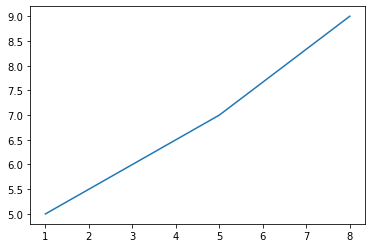

In [19]:
x =[1,5,8]
y =[5,7,9]
plt.plot(x,y)
plt.show() # 在Anaconda中可写可不写，在有些环境内不支持可以加上

In [20]:
# 不同年月销售额趋势分析

In [21]:
# 导入pandas matplotlib 读取数据

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data1 = pd.read_excel('./销售数据.xlsx')
# 只显示前5行
data1.head()

,序号,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,platform,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额
0,1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,APP,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6
1,2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,APP,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2
2,3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,APP,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8
3,4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,APP,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4
4,5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,PC,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5


In [24]:
data1['创建时间']

0       2017-03-25
1       2017-10-25
2       2018-01-18
3       2018-02-10
4       2019-08-30
           ...    
60546   2020-01-27
60547   2020-01-28
60548   2020-01-28
60549   2020-01-29
60550   2020-01-29
Name: 创建时间, Length: 60551, dtype: datetime64[ns]

In [25]:
# 创建年月把‘创建时间‘格式转换成‘年月’格式没有使用pd.to_datetime是因为上面已经显示是datetime64的时间格式了

In [26]:
data1['年月'] = data1['创建时间'].apply(lambda x:x.strftime('%Y-%m'))

In [27]:
data1

,序号,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,...,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额,年月
0,1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,...,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6,2017-03
1,2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,...,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2,2017-10
2,3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,...,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8,2018-01
3,4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,...,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4,2018-02
4,5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,...,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60546,60547,10414342,吴俊E9667,guide_02,city0089,PC,23,175****8672,男,2020-01-27,...,中国,东北,吉林,郑家屯,360导航,0,0,0.0,0.0,2020-01
60547,60548,10414602,李明tEVm2570,search_02,city0086,Others,38,187****8829,女,2020-01-28,...,中国,东北,吉林,榆树,百度联盟,0,0,0.0,0.0,2020-01
60548,60549,10414637,张建国EKEN2401,search_03,city0269,Others,35,177****5915,女,2020-01-28,...,中国,华东,山东,菏泽,百度橱窗,0,0,0.0,0.0,2020-01
60549,60550,10415023,王成fRlU5072,guide_02,city0044,IOS,23,187****0047,女,2020-01-29,...,中国,东北,黑龙江,铁力,360导航,0,0,0.0,0.0,2020-01


In [28]:
# 分组聚合，groupby以什么分组的分组之后这个就会变成索引

In [29]:
data2 = data1.groupby('年月').agg({'实付金额':'sum'})

In [30]:
data2

,实付金额
年月,
2017-01,1370423.77
2017-02,924894.29
2017-03,970353.12
2017-04,1005358.02
2017-05,1020072.03
2017-06,792762.80
2017-07,965713.49
2017-08,1686160.46
2017-09,930084.36


In [31]:
data2.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01'],
      dtype='object', name='年月')

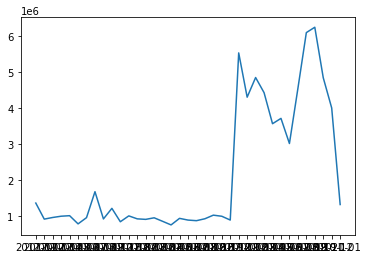

In [32]:
x = data2.index
y = data2['实付金额']
plt.plot(x,y)

# 更改画布大小

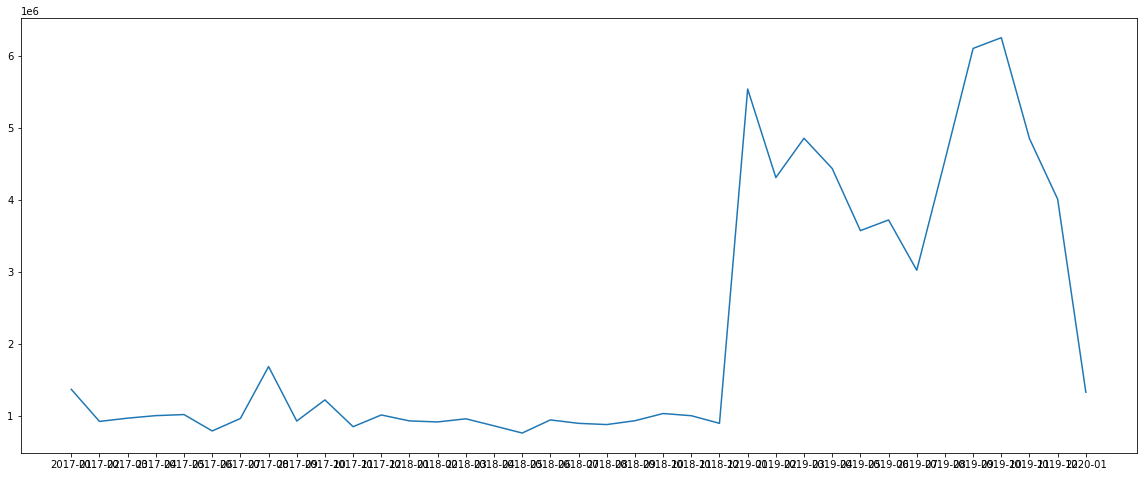

In [33]:
plt.figure(figsize = (20,8))# (20,8)是一个元组
x = data2.index
y = data2['实付金额']
plt.plot(x,y)

# 旋转x轴的字的角度

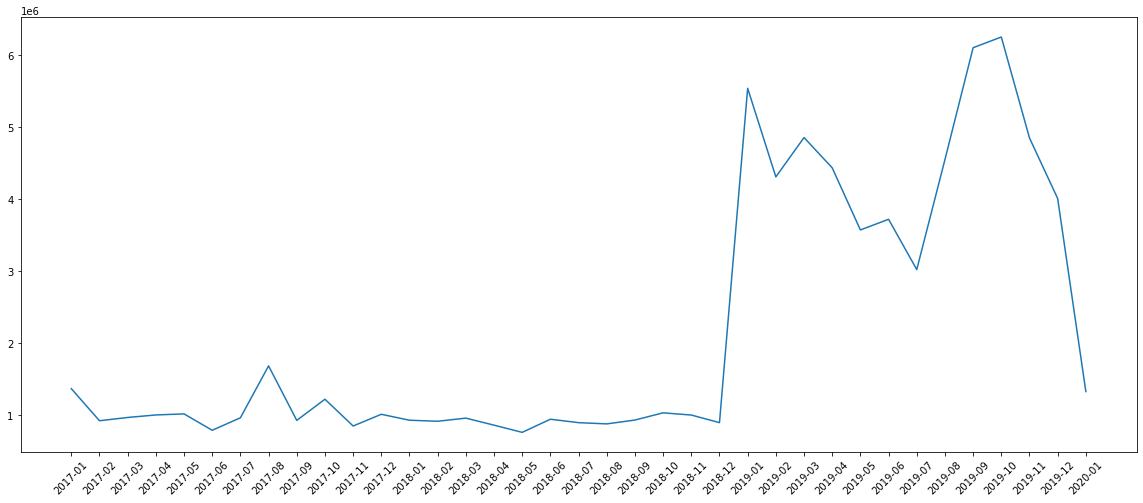

In [34]:
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
# x代表x轴，ticks表示刻度
plt.xticks(rotation = 45)
plt.plot(x,y)

# 改变轴、刻度线和标签的色彩

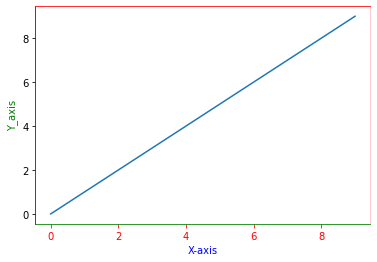

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)# 添加子图（111）代表第1行第1列   第 1个元素
ax.plot(range(10))# range(10)一个列表
ax.set_xlabel('X-axis')# x（x轴）label（上的文本）
ax.set_ylabel('Y_axis')
# 改变下，上，左，右边线的颜色
ax.spines['bottom'].set_color('green')
ax.spines['top'].set_color('red')
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('pink')
# 改变x，y标签的颜色
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('green')
# 改变x轴刻度线的颜色
ax.tick_params(axis = 'x',colors = 'red')

# 更改折线的色彩及形状

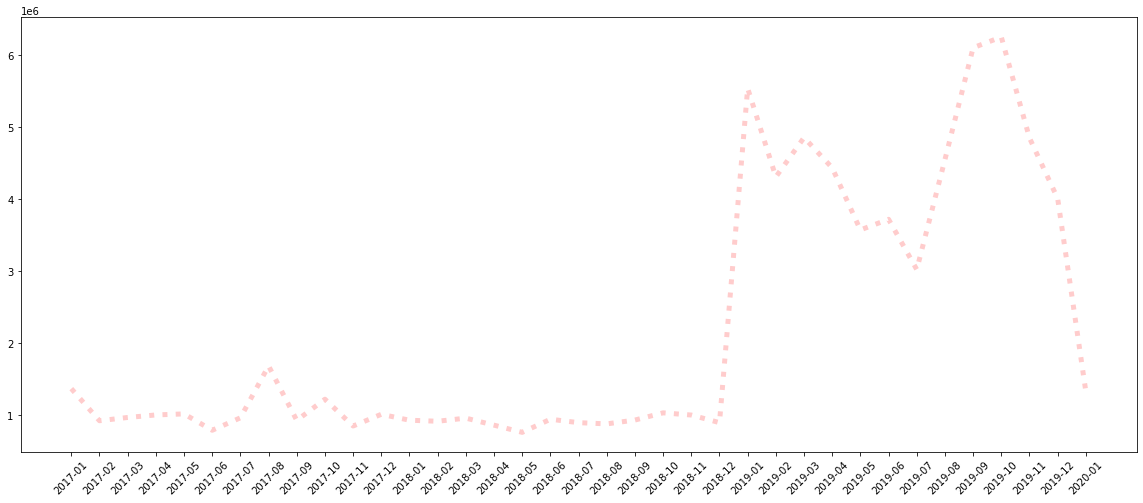

In [36]:
# linestyle 四种形式【'-'solid(实线)，'--'dashed(短线)'-.'dashdot(短点相间线),':'dotted(虚点线)】
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
# 更改折线的颜色，样式，大小，透明度
plt.plot(x,y,color = 'red',linestyle = ':',linewidth = 5,alpha = 0.2)

# 更改折点样式

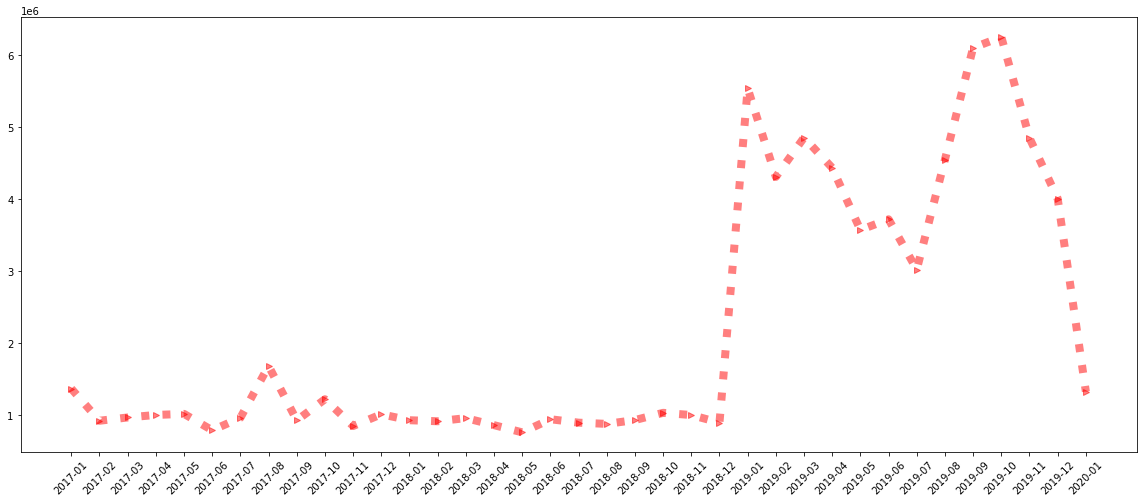

In [37]:
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
plt.plot(x,y,color = 'red',linestyle = ':',linewidth =8,alpha = 0.5,marker = '>')
# marker 为折点样式

# 把做的图保存成图片（.png .jpg）

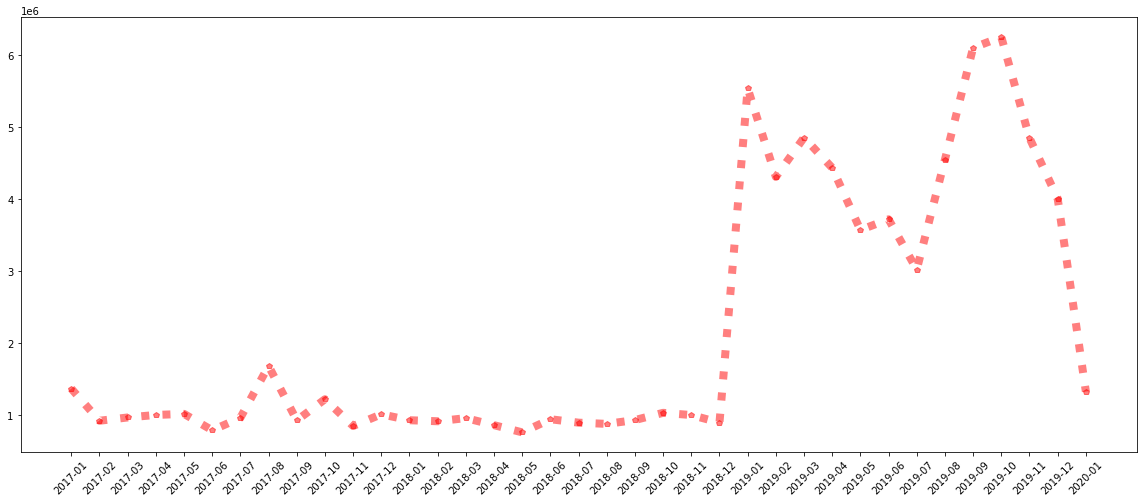

In [38]:
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
plt.plot(x,y,color = 'red',linestyle = ':',linewidth =8,alpha = 0.5,marker = 'p')
# 保存图片格式为.png,.jpg
plt.savefig('./t1.png')

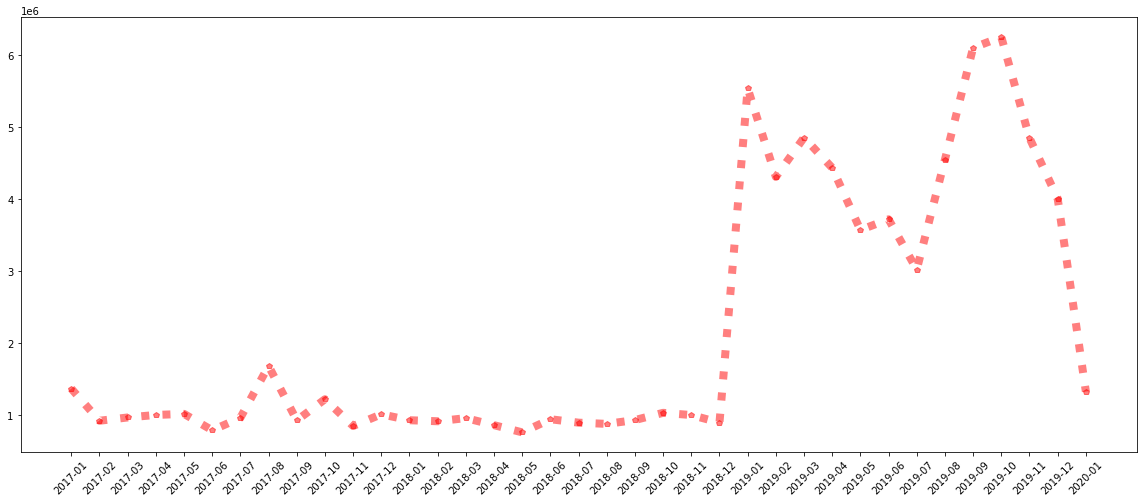

In [39]:
# 保存成.jpg
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
plt.plot(x,y,color = 'red',linestyle = ':',linewidth =8,alpha = 0.5,marker = 'p')
plt.savefig('./t1.jpg')

# 解决中文问题

Text(0.5, 1.0, '不同月份销售额趋势分析')

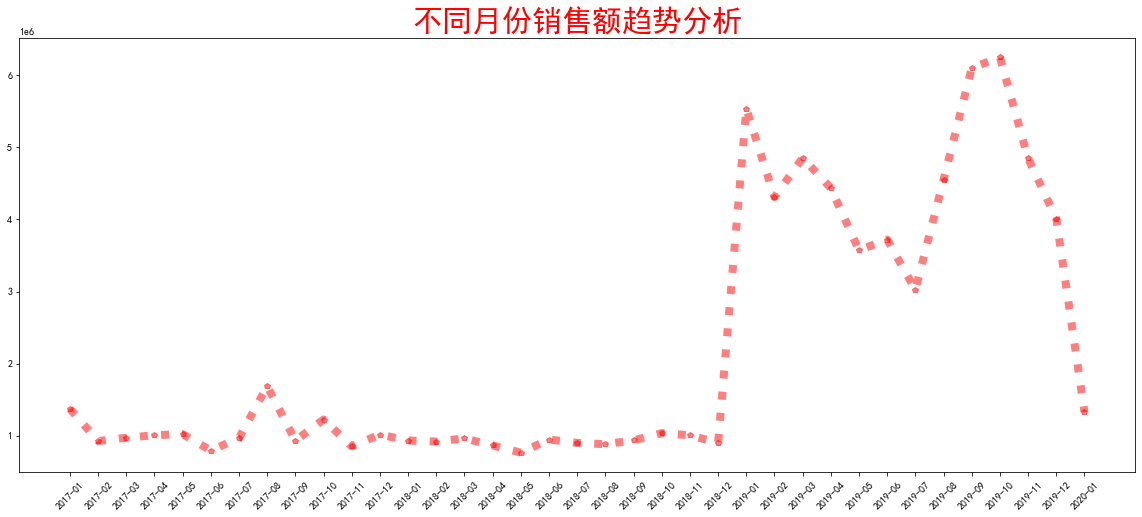

In [40]:
# 苹果电脑换成mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
# 添加plt.rcParams来解决中文不能显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
plt.plot(x,y,color = 'red',linestyle = ':',linewidth =8,alpha = 0.5,marker = 'p')
# plt.title 图的标题
plt.title('不同月份销售额趋势分析',fontsize = 30,color = 'red')

Text(0, 0.5, '销售额')

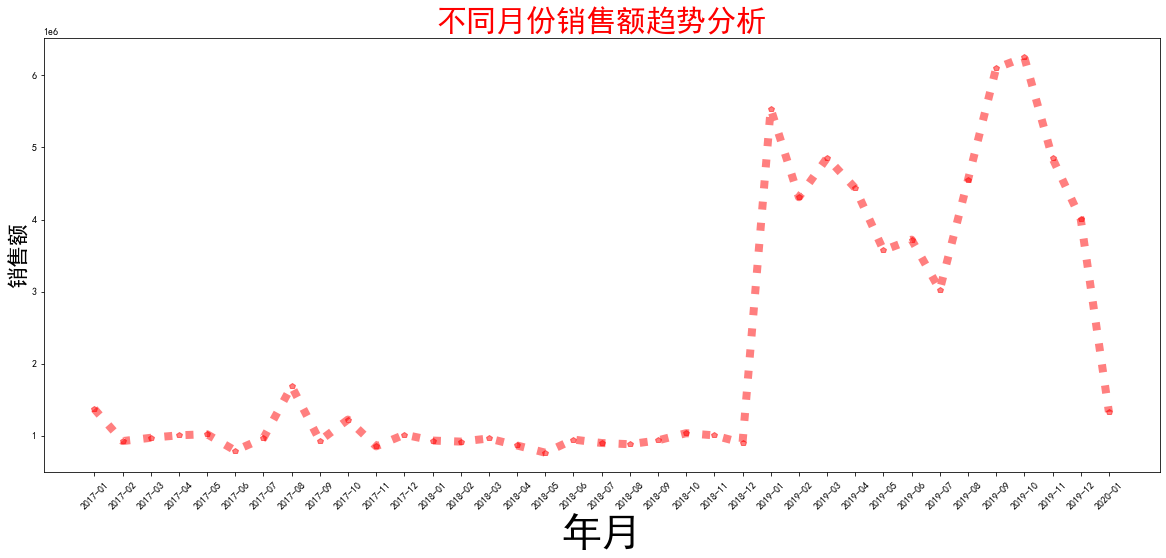

In [41]:
# 年月，销售额
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (20,8))
x = data2.index
y = data2['实付金额']
plt.xticks(rotation = 45)
plt.plot(x,y,color = 'red',linestyle = ':',linewidth =8,alpha = 0.5,marker = 'p')
plt.title('不同月份销售额趋势分析',fontsize = 30,color = 'red')
plt.xlabel('年月',fontsize = 40)
plt.ylabel('销售额',fontsize = 22)

# 一图多线

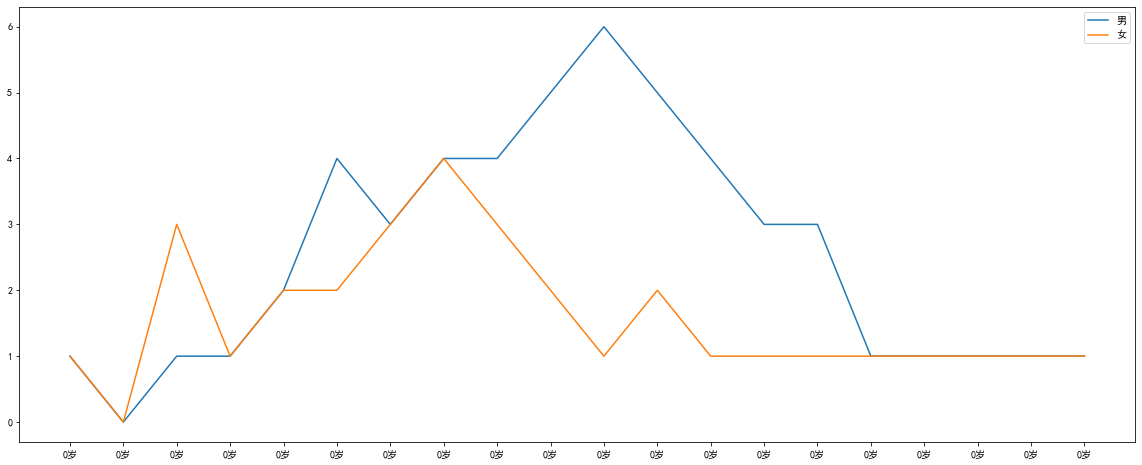

In [42]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (20,8))
y1 = [1,0,1,1,2,4,3,4,4,5,6,5,4,3,3,1,1,1,1,1]
y2 = [1,0,3,1,2,2,3,4,3,2,1,2,1,1,1,1,1,1,1,1]
x = range(11,31)
plt.plot(x,y1,label = '男')
plt.plot(x,y2,label = '女')
# 列表推导式，format(i)格式化i把格式化的i给到0岁 ，改变x轴的刻度显示
xtick_labels = ['0岁'.format(i) for i in x]
plt.xticks(x,xtick_labels)# 其中x是不是指轴的方向而是x = range(11,33)
# 显示图列，loc的值从0-10显示到不同的位置，查看官方示例：光标指定当前所需查询位置+shift+tab
plt.legend(loc = 0)

# 多子图

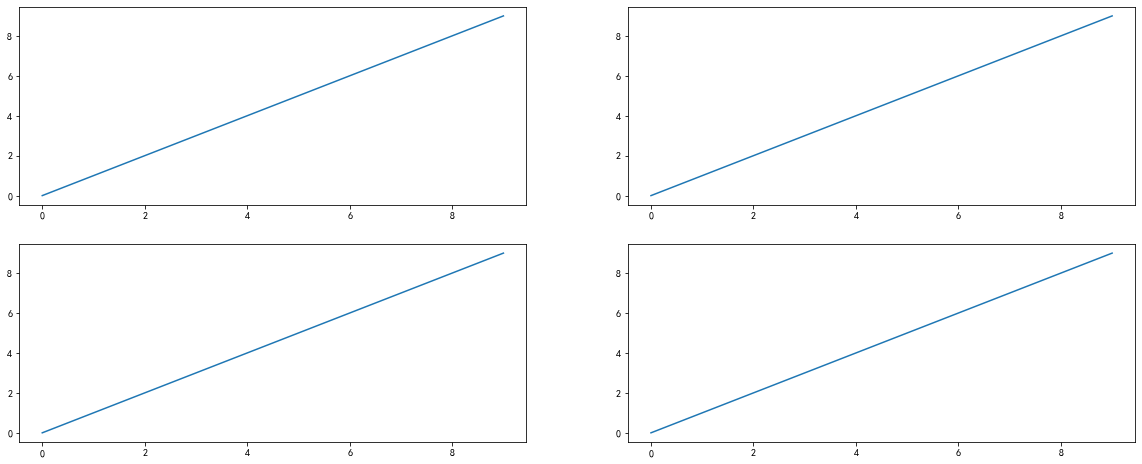

In [43]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(221)
ax1.plot(range(10))
ax2 = fig.add_subplot(222)
ax2.plot(range(10))
ax3 = fig.add_subplot(223)
ax3.plot(range(10))
ax4 = fig.add_subplot(224)
ax4.plot(range(10))

# 设置坐标轴范围

In [44]:
import numpy as np

(-5.0, 5.0)

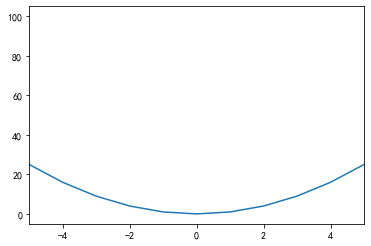

In [45]:
# 显示负号plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["axes.unicode_minus"] = False
x = np.arange(-10,11,1)
y = x ** 2
plt.plot(x,y)
# 限制x轴的刻度显示
plt.xlim(xmin = -5,xmax = 5)

# 更改轴范围及轴的默认显示方式

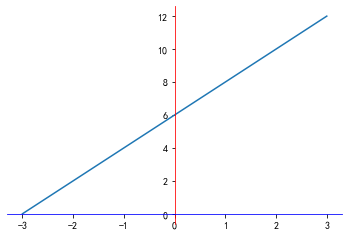

In [46]:
import matplotlib.pyplot as plt
import numpy as np
#解决中文
plt.rcParams["font.family"] = "SimHei"
#解决负号
plt.rcParams["axes.unicode_minus"] = False
y = range(0,14,2) # x轴的位置
x = [-3,-2,-1,0,1,2,3]
# plt.figure(figsize=(20,8),dpi=80)
# 获得当前图表的图像
ax = plt.gca()
# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')
# 设置底边的移动范围，移动到y轴的0位置,'data':移动轴的位置到交叉轴的指定坐标
ax.spines['bottom'].set_position(('data', 0))
# 只看红线的移动位置
ax.spines['left'].set_position(('data', 0))
# data后面的数值0可以修改
plt.plot(x,y)
plt.show()

# 散点图

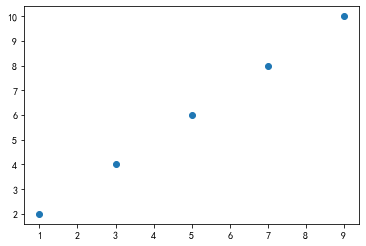

In [47]:
x = [1,3,5,7,9]
y = [2,4,6,8,10]
plt.scatter(x,y)

In [48]:
data3 = pd.read_excel('./投放渠道分析.xlsx')
data3

,宣传推广渠道,曝光量,点击量,点击率
0,朋友圈,8327,1259,0.151195
1,公众号,82298,43329,0.526489
2,今日头条,53342,9875,0.185126
3,百度,37742,954,0.025277
4,360浏览器,2269,908,0.400176
5,谷歌浏览器,88990,19798,0.222474
6,抖音,43936,37414,0.851557
7,快手,6312,463,0.073352
8,视频号,61457,5835,0.094944


<function matplotlib.pyplot.show(close=None, block=None)>

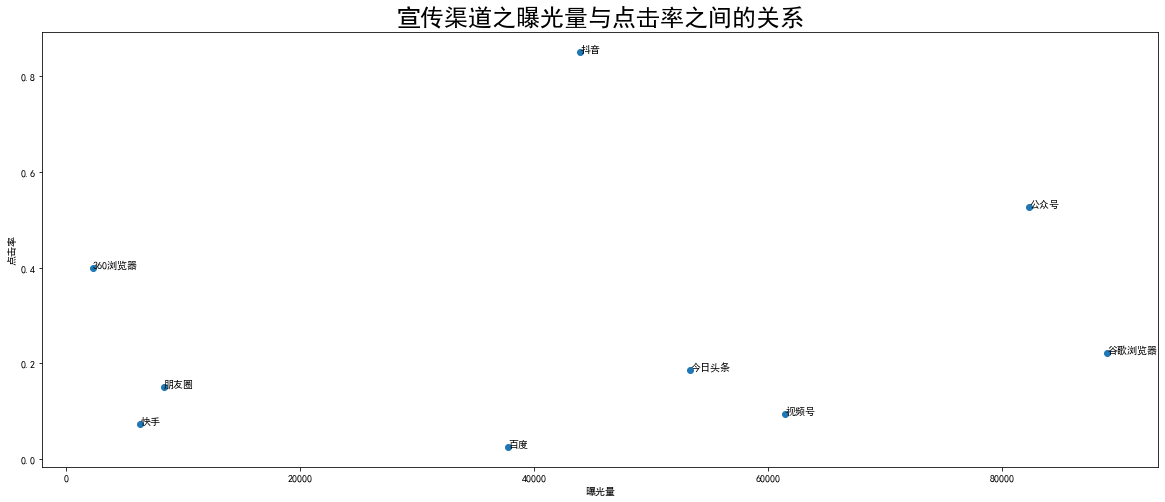

In [49]:
plt.figure(figsize=(20,8))
x = data3['曝光量']
y = data3['点击率']
z = data3['宣传推广渠道']
plt.scatter(x,y)
# f"{k}"对遍历之后的k的值进行格式化
for i,j,k in zip(x,y,z):
    plt.text(i,j,f"{k}")
plt.xlabel('曝光量')
plt.ylabel('点击率')
plt.title('宣传渠道之曝光量与点击率之间的关系',fontsize = 24 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

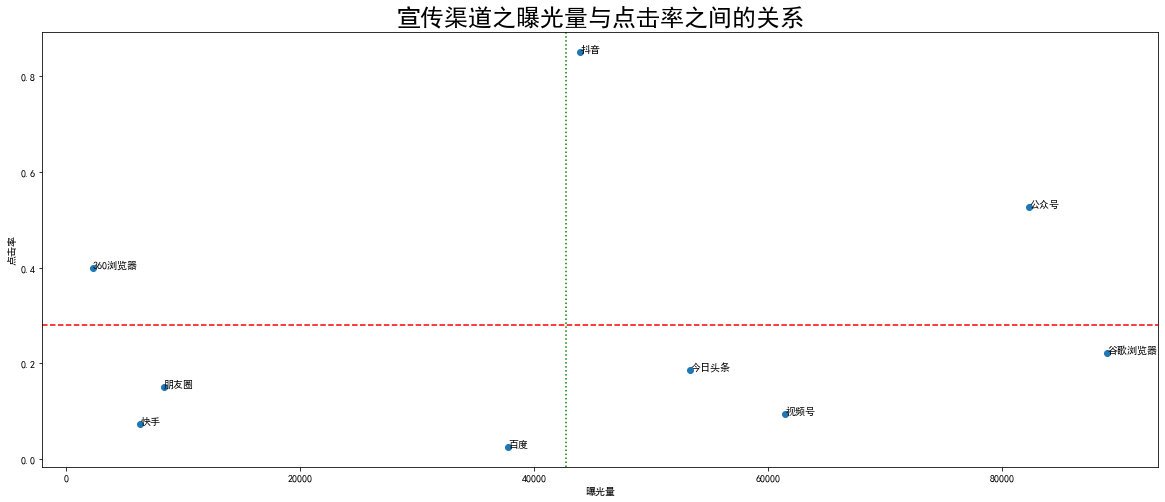

In [50]:
plt.figure(figsize=(20,8))
x = data3['曝光量']
y = data3['点击率']
z = data3['宣传推广渠道']
plt.scatter(x,y)
# f"{k}"对遍历之后的k的值进行格式化
for i,j,k in zip(x,y,z):
    plt.text(i,j,f"{k}")
plt.xlabel('曝光量')
plt.ylabel('点击率')
plt.title('宣传渠道之曝光量与点击率之间的关系',fontsize = 24 )
# 将数值转化成均值mean()
x_m = data3['曝光量'].mean()
y_m = data3['点击率'].mean()
# 添加辅助线
plt.axhline(y_m, color='r', linestyle='--')  # 添加水平辅助线
plt.axvline(x_m, color='g', linestyle=':')  # 添加垂直辅助线
plt.show

# 柱形图 

<BarContainer object of 4 artists>

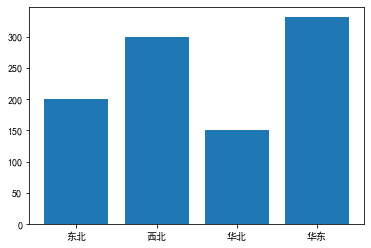

In [51]:
x = ['东北','西北','华北','华东'] 
y= [200,300,150,331]
plt.bar(x,y)

In [52]:
df4 = pd.read_excel('./销售数据.xlsx')
df4

,序号,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,platform,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额
0,1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,APP,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6
1,2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,APP,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2
2,3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,APP,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8
3,4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,APP,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4
4,5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,PC,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60546,60547,10414342,吴俊E9667,guide_02,city0089,PC,23,175****8672,男,2020-01-27,PC,中国,东北,吉林,郑家屯,360导航,0,0,0.0,0.0
60547,60548,10414602,李明tEVm2570,search_02,city0086,Others,38,187****8829,女,2020-01-28,APP,中国,东北,吉林,榆树,百度联盟,0,0,0.0,0.0
60548,60549,10414637,张建国EKEN2401,search_03,city0269,Others,35,177****5915,女,2020-01-28,APP,中国,华东,山东,菏泽,百度橱窗,0,0,0.0,0.0
60549,60550,10415023,王成fRlU5072,guide_02,city0044,IOS,23,187****0047,女,2020-01-29,MiniProgram,中国,东北,黑龙江,铁力,360导航,0,0,0.0,0.0


In [53]:
df5 = df4.groupby('地区').agg({'实付金额':'sum'})
df5

,实付金额
地区,
东北,16606514.90
中南,20975829.83
华东,23245963.63
华北,9253650.46
西北,3394200.42
西南,6862232.70


<BarContainer object of 6 artists>

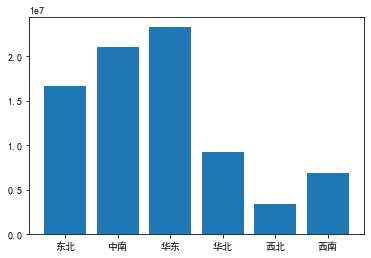

In [54]:
x= df5.index
y = df5['实付金额']
plt.bar(x,y)

# 调整宽度

<BarContainer object of 6 artists>

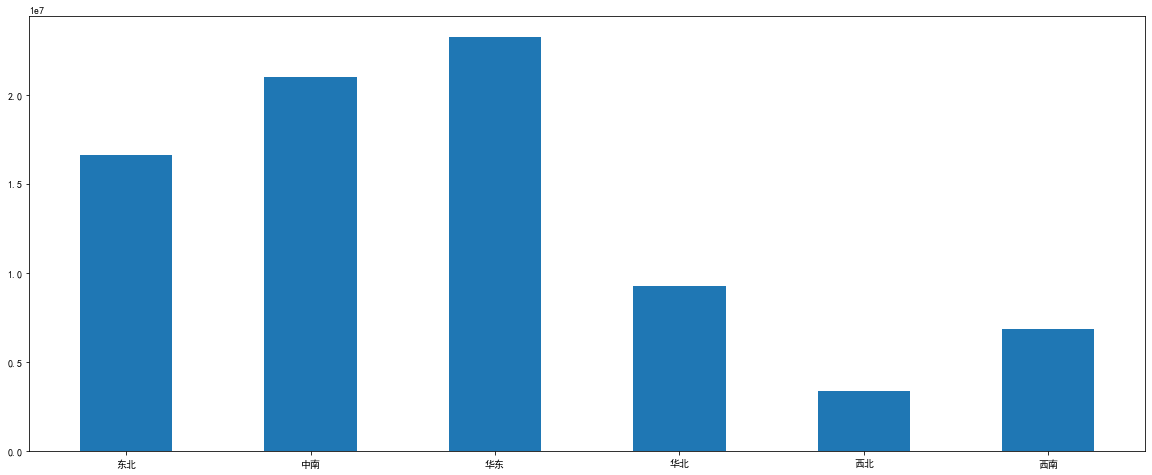

In [55]:
plt.figure(figsize=(20,8))
plt.bar(x,y,width = 0.5)

# 条形图

<BarContainer object of 6 artists>

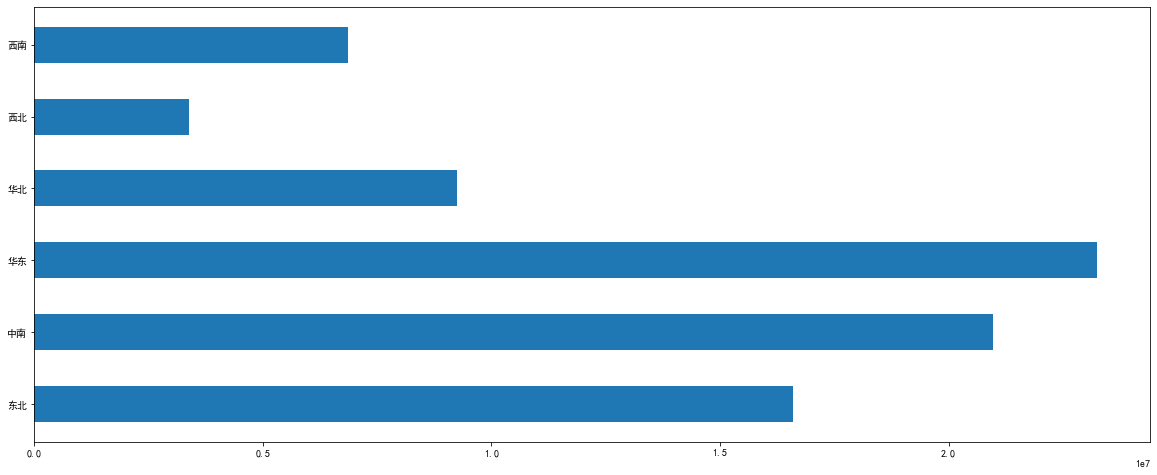

In [71]:
plt.figure(figsize=(20,8))
x= df5.index
y = df5['实付金额']
plt.barh(x,y,height = 0.5)# height调整宽度

# 堆积柱形图

In [57]:
df6 = df4.groupby(['地区','sex']).agg({'销量':'sum'})
df6

销量
地区 sex       
东北 女    19901
   男     9055
中南 女    24358
   男    11725
华东 女    26278
   男    12106
华北 女    10250
   男     4932
西北 女     4010
   男     2025
西南 女     7384
   男     3375

In [58]:
# unstack()函数会将最内层的索引转换为列
df6 = df4.groupby(['地区','sex']).agg({'销量':'sum'}).unstack()
df6

销量       
sex      女      男
地区               
东北   19901   9055
中南   24358  11725
华东   26278  12106
华北   10250   4932
西北    4010   2025
西南    7384   3375

In [59]:
# 使用pandas直接画图

<AxesSubplot:xlabel='地区'>

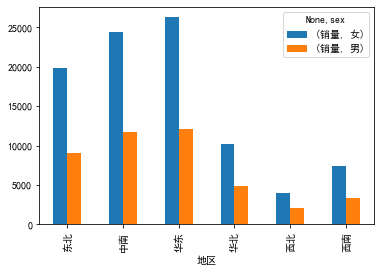

In [60]:
df6.plot(kind = 'bar')# 此图为并列柱形图

<AxesSubplot:xlabel='地区'>

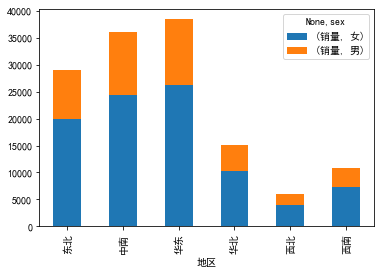

In [61]:
df6.plot(kind = 'bar',stacked = True)# 此图为堆积柱形图

# 直方图

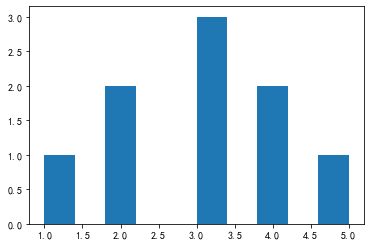

In [62]:
# 生成数据
data4 = [1, 2, 2, 3, 3, 3, 4, 4, 5]

# 画直方图
plt.hist(data4)

# 显示图像
plt.show()

In [63]:
df4

,序号,user_id,user_name,chann_id,city_id,system,age,phonenum,sex,创建时间,platform,国家,地区,省份,city,chann_name,订单量,销量,消费金额,实付金额
0,1,10013788,敖大戴,guide_01,city0138,IOS,46,152****6601,女,2017-03-25,APP,中国,华北,河北,南宫,hao123,6,28,13014.6,12614.6
1,2,10048735,浦葛卫之翼环城店一一柯晓闫,union_03,city0548,IOS,60,171****1663,女,2017-10-25,APP,中国,中南,湖南,耒阳,百度网盟,4,36,28839.2,26979.2
2,3,10062827,亡命天涯不如早点回卜。,search_02,city0061,Android,54,180****9153,女,2018-01-18,APP,中国,东北,吉林,辉南,百度联盟,4,16,4294.8,4294.8
3,4,10066683,闵屈戎,union_01,city0454,IOS,32,133****1258,男,2018-02-10,APP,中国,中南,广东,台城,360网盟,4,19,3552.4,3512.4
4,5,10294804,姚建平AzQoe545,platform_01,city0133,PC,33,184****3820,女,2019-08-30,PC,中国,华北,河北,邯郸,今日头条,4,12,1582.5,1392.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60546,60547,10414342,吴俊E9667,guide_02,city0089,PC,23,175****8672,男,2020-01-27,PC,中国,东北,吉林,郑家屯,360导航,0,0,0.0,0.0
60547,60548,10414602,李明tEVm2570,search_02,city0086,Others,38,187****8829,女,2020-01-28,APP,中国,东北,吉林,榆树,百度联盟,0,0,0.0,0.0
60548,60549,10414637,张建国EKEN2401,search_03,city0269,Others,35,177****5915,女,2020-01-28,APP,中国,华东,山东,菏泽,百度橱窗,0,0,0.0,0.0
60549,60550,10415023,王成fRlU5072,guide_02,city0044,IOS,23,187****0047,女,2020-01-29,MiniProgram,中国,东北,黑龙江,铁力,360导航,0,0,0.0,0.0


In [64]:
df4['销量']

0        28
1        36
2        16
3        19
4        12
         ..
60546     0
60547     0
60548     0
60549     0
60550     0
Name: 销量, Length: 60551, dtype: int64

(array([5.1728e+04, 5.5750e+03, 2.1690e+03, 7.4700e+02, 2.3200e+02,
        7.5000e+01, 1.5000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

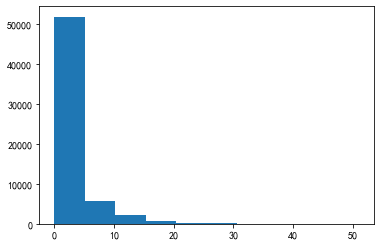

In [65]:
plt.hist(df4['销量'])

Text(0, 0.5, '出现频次')

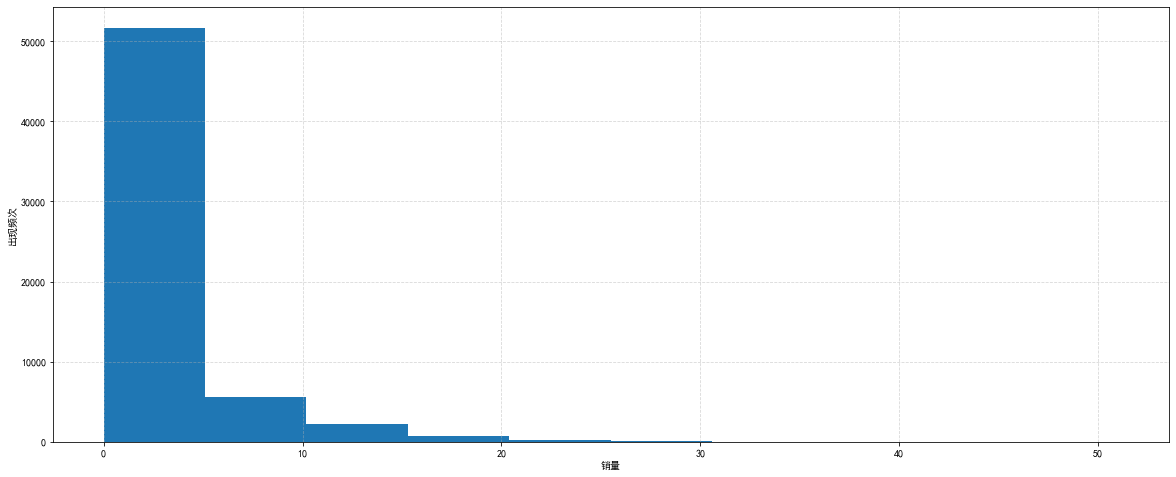

In [66]:
plt.figure(figsize=(20,8))
# 添加表格
plt.grid(linestyle = '--',alpha = 0.5)
plt.hist(df4['销量'])
plt.xlabel('销量')
plt.ylabel('出现频次')

# 饼图

In [67]:
df4.groupby('地区').agg({'销量':'sum'})

,销量
地区,
东北,28956
中南,36083
华东,38384
华北,15182
西北,6035
西南,10759


In [68]:
df7= df4[['地区','销量']].groupby('地区').agg({'销量':'sum'}).sort_values(by = '销量',ascending= False)
df7

,销量
地区,
华东,38384
中南,36083
东北,28956
华北,15182
西南,10759
西北,6035


([<matplotlib.patches.Wedge at 0x24f9db36ee0>,
 [Text(0.691836797347895, 0.8551969631818204, '华东'),
  Text(-0.9528639768071948, 0.5495909767301298, '中南'),
  Text(-0.6073272849269283, -0.9171442465519182, '东北'),
  Text(0.46774843347100514, -0.9955960039018944, '华北'),
  Text(0.9492604528580844, -0.5557918608972832, '西南'),
  Text(1.0892334588320394, -0.15352677994666705, '西北')],
 [Text(0.37736552582612454, 0.4664710708264474, '28.3%'),
  Text(-0.5197439873493789, 0.29977689639825256, '26.6%'),
  Text(-0.33126942814196086, -0.500260498119228, '21.4%'),
  Text(0.25513550916600275, -0.5430523657646696, '11.2%'),
  Text(0.5177784288316823, -0.3031591968530635, '7.9%'),
  Text(0.5941273411811123, -0.0837418799709093, '4.5%')])

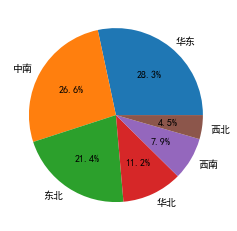

In [69]:
di = df7.index
sale = df7['销量']
#  '%1.1f%%保留小数点后一位
plt.pie(sale,labels = di,autopct = '%1.1f%%')